#Install

In [ ]:
!pip install pandas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.metrics import confusion_matrix

#Connection Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#course_info


In [ ]:
course_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/course_info.csv')

In [ ]:
course_info.head(10)

,id,course_id,start,end,course_type,category
0,6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN
1,5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN
2,9433,course-v1:ZK+06093+J,2018-01-01 08:00:00,2020-01-01 00:00:00,0,NaN
3,8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN
4,231,FUDAN/CFD004/2014.9-2015.1,2014-09-10 08:00:00,2015-09-10 00:00:00,0,NaN
5,7645,course-v1:ANUx+EBM05x+3T2017,2017-09-18 08:00:00,2018-09-17 08:00:00,0,NaN
6,9953,course-v1:ChongqingUniversity+CQUMOOCMSE21202-...,2017-02-19 10:30:00,2017-05-15 00:00:00,0,NaN
7,7625,course-v1:JLUx+0000045603+SP,2016-09-26 08:00:00,NaN,1,NaN
8,8657,course-v1:TsinghuaX+00680082_1X_p1+sp,2016-12-01 08:00:00,NaN,1,philosophy
9,8833,course-v1:global_TsinghuaX+70120073X+sp,2016-09-12 10:00:00,2017-01-16 10:00:00,0,NaN


In [ ]:
course_info.shape

(6410, 6)

In [ ]:
course_info.drop_duplicates(inplace=True)
course_info.shape

(6410, 6)

In [ ]:
 course_info.dtypes

,0
id,object
course_id,object
start,object
end,object
course_type,int64
category,object


In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6410 non-null   object
 1   course_id    6410 non-null   object
 2   start        6410 non-null   object
 3   end          5877 non-null   object
 4   course_type  6410 non-null   int64 
 5   category     1454 non-null   object
dtypes: int64(1), object(5)
memory usage: 300.6+ KB


In [ ]:
course_info.isnull().sum()

,0
id,0
course_id,0
start,0
end,533
course_type,0
category,4956


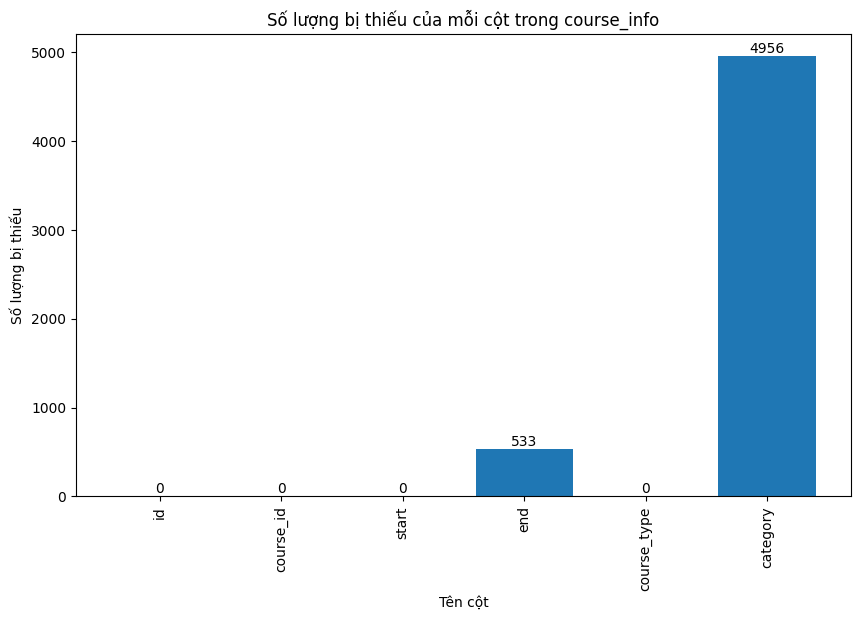

In [ ]:
missing_values = course_info.isnull().sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values)

# Thêm số lượng bị thiếu trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Tên cột')
plt.ylabel('Số lượng bị thiếu')
plt.title('Số lượng bị thiếu của mỗi cột trong course_info')
plt.xticks(rotation=90)
plt.show()

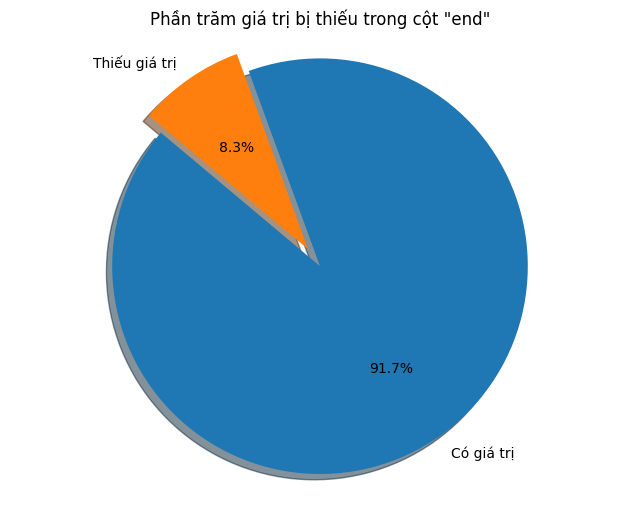

In [ ]:
# Tính phần trăm giá trị bị thiếu trong cột "end"
missing_percentage = course_info['end'].isna().mean() * 100

# Tạo mảng dữ liệu cho biểu đồ tròn
labels = ['Có giá trị', 'Thiếu giá trị']
sizes = [100 - missing_percentage, missing_percentage]
colors = ['#1f77b4', '#ff7f0e']
explode = (0, 0.1)  # Phần bổ sung cho phần thiếu giá trị

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Phần trăm giá trị bị thiếu trong cột "end"')
plt.axis('equal')
plt.show()

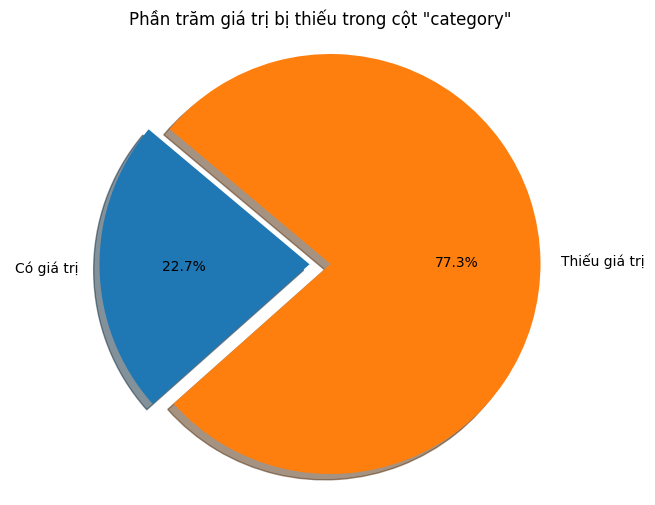

In [ ]:
missing_percentage = course_info['category'].isna().mean() * 100

# Tạo mảng dữ liệu cho biểu đồ tròn
labels = ['Có giá trị', 'Thiếu giá trị']
sizes = [100 - missing_percentage, missing_percentage]
colors = ['#1f77b4', '#ff7f0e']
explode = (0, 0.1)  # Phần bổ sung cho phần thiếu giá trị

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Phần trăm giá trị bị thiếu trong cột "category"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:** Bộ dữ liệu bị thiếu thông tin ở các trường thông tin: thời điểm kết thúc khóa học và tên lĩnh vực của khóa học.

Cột **"end"**: Có tỷ lệ khoảng 8.3% giá trị bị thiếu. Điều này cho thấy một phần nhỏ các khóa học không có thông tin về thời điểm kết thúc.
Cột **"category"**: Tỷ lệ phần trăm giá trị bị thiếu là 77.3%. Điều này cho thấy rất nhiều thông tin về lĩnh vực (category) của các khóa học bị thiếu trong bộ dữ liệu.

##start


Đầu tiên chuyển start và end sang định dang date để xử lý

In [ ]:
course_info.start = pd.to_datetime(course_info.start)
course_info.end = pd.to_datetime(course_info.end)

In [ ]:
course_info.describe()

,start,end,course_type
count,6410,5877,6410.000000
mean,2016-09-14 00:40:20.377535232,2017-04-09 06:50:41.807044352,0.083151
min,2010-01-01 08:00:00,2013-12-29 16:00:00,0.000000
25%,2016-02-22 09:00:00,2016-07-09 00:00:00,0.000000
50%,2016-10-31 08:00:00,2017-03-12 23:30:00,0.000000
75%,2017-03-31 08:00:00,2017-08-16 23:30:00,0.000000
max,2037-01-16 08:00:00,2066-01-01 00:00:00,1.000000
std,NaN,NaN,0.276132


**Theo mô tả của thì bộ dữ liệu được khảo sát trong khoảng thời gian từ tháng 8 năm 2015 đến tháng 8 năm 2017. Tuy nhiên, ở cột start có giá trị cao nhất là năm 2037. Điều này không hợp lý cần được xử lý.**

In [ ]:
start_course = course_info[['start']].copy()
course_info.head()
start_course['time'] = pd.to_datetime(start_course['start'])
start_course['year_month'] = start_course['time'].dt.to_period('M')
start_course['year_month_index'] = start_course['time'].dt.year * 12 + start_course['time'].dt.month
start_course = start_course.sort_values(by='year_month_index')
start_course.head()
# Tính toán số lượng đăng ký khóa học theo tháng và năm
registration_counts = start_course.groupby('year_month')['year_month_index'].count()

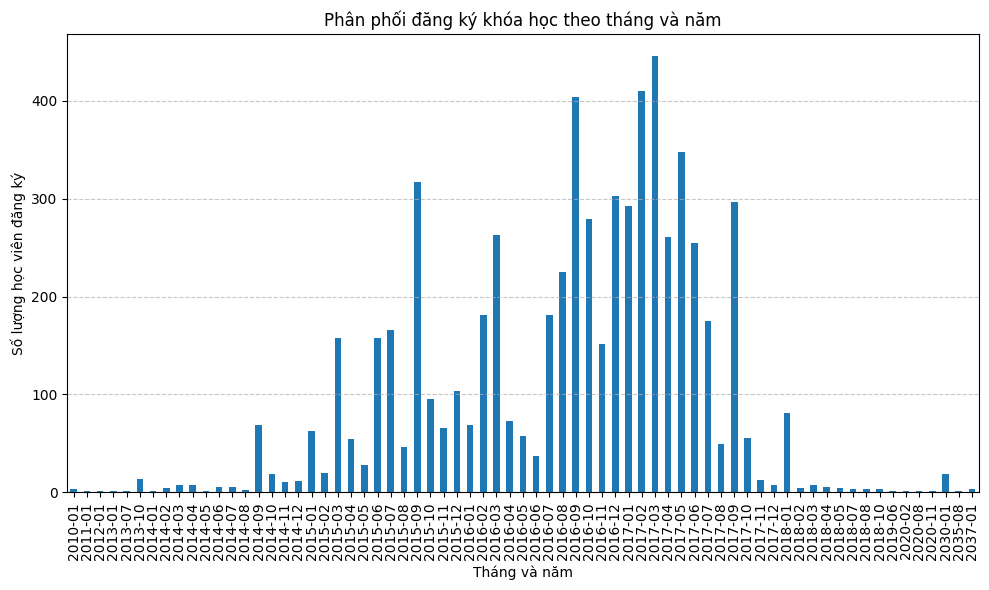

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
registration_counts.plot(kind='bar')
plt.title('Phân phối đăng ký khóa học theo tháng và năm')
plt.xlabel('Tháng và năm')
plt.ylabel('Số lượng học viên đăng ký')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**  Các khóa học được thu thập có thời gian bắt đầu tập trung từ vào khoảng 09/2014 đến 01/2018.

In [ ]:
# Tạo các điều kiện lọc
condition_1 = course_info['start'] < pd.Timestamp('2015-01-01')
condition_2 = course_info['start'] > pd.Timestamp('2017-08-31')

# Lọc dữ liệu và đếm số lượng mẫu thỏa mãn điều kiện
counts = len(course_info[condition_1 | condition_2])

print("Số lượng mẫu có start không nằm trong khoảng 01/2015-08/2017 là:", counts)

Số lượng mẫu có start không nằm trong khoảng 01/2015-08/2017 là: 675


**Khoảng giá trị hợp lý cho start là từ 01/01/2015 đến 31/08/2017**.
(31/08/2017 là thời gian cuối giai đoạn khảo sát.)

Thống kê có 675 giá trị không hợp lệ/ không đáng tin cậy trong cột start (675/6410 mẫu)

##end


In [ ]:
course_info.describe()

,start,end,course_type
count,6410,5877,6410.000000
mean,2016-09-14 00:40:20.377535232,2017-04-09 06:50:41.807044352,0.083151
min,2010-01-01 08:00:00,2013-12-29 16:00:00,0.000000
25%,2016-02-22 09:00:00,2016-07-09 00:00:00,0.000000
50%,2016-10-31 08:00:00,2017-03-12 23:30:00,0.000000
75%,2017-03-31 08:00:00,2017-08-16 23:30:00,0.000000
max,2037-01-16 08:00:00,2066-01-01 00:00:00,1.000000
std,NaN,NaN,0.276132


Cột **end** chứa những giá trị bị thiếu như đã thống kê bên trên

Ngoài ra, cũng chưa các giá trị không đáng tin cậy (giá trị max ở cột **end** lên tới năm 2066)

In [ ]:
end_course = course_info[['end']].copy()
end_course = end_course.dropna(subset=['end'])
end_course['time'] = pd.to_datetime(end_course['end'])
end_course['year_month'] = end_course['time'].dt.to_period('M')
end_course['year_month_index'] = end_course['time'].dt.year * 12 + end_course['time'].dt.month
end_course = end_course.sort_values(by='year_month_index')
print(len(end_course))
end_course.head()

5877


,end,time,year_month,year_month_index
2790,2013-12-29 16:00:00,2013-12-29 16:00:00,2013-12,24168
3217,2013-12-29 16:00:00,2013-12-29 16:00:00,2013-12,24168
1739,2014-01-31 16:00:00,2014-01-31 16:00:00,2014-01,24169
1811,2014-01-23 00:00:00,2014-01-23 00:00:00,2014-01,24169
5741,2014-01-23 00:00:00,2014-01-23 00:00:00,2014-01,24169


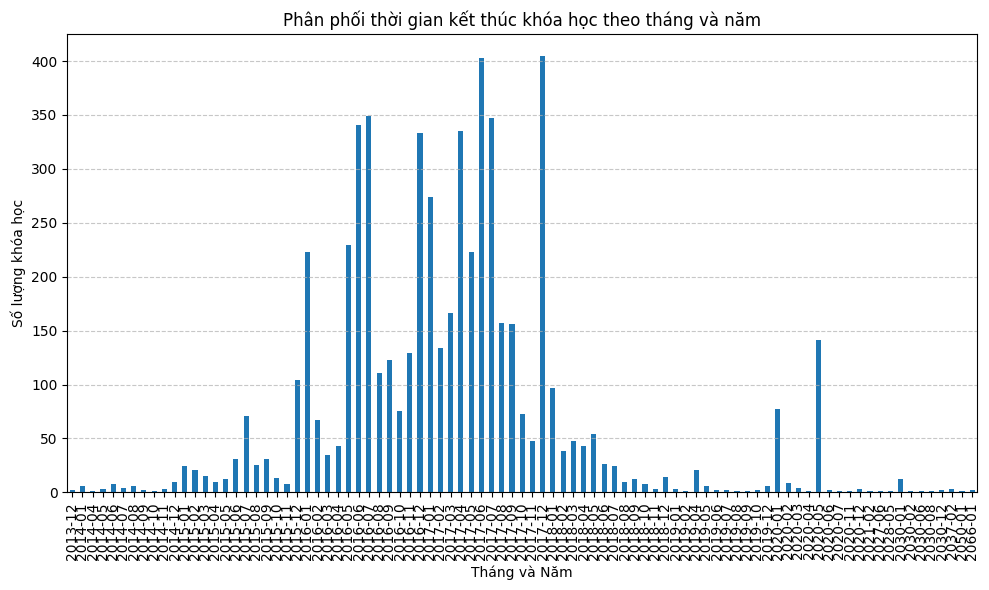

In [ ]:
# Tính toán số lượng đăng ký khóa học theo tháng và năm
registration_counts = end_course.groupby('year_month')['year_month_index'].count()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
registration_counts.plot(kind='bar')
plt.title('Phân phối thời gian kết thúc khóa học theo tháng và năm')
plt.xlabel('Tháng và Năm')
plt.ylabel('Số lượng khóa học')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Tính số lượng mẫu có giá trị trong cột 'end' lớn hơn năm 2018
count_end_greater_than_2018 = course_info[course_info['end'].dt.year > 2018]['end'].count()

# Tính số lượng giá trị null trong cột 'end'
count_null_values = course_info['end'].isnull().sum()

print("Số lượng mẫu có giá trị trong cột 'end' lớn hơn năm 2018 là:", count_end_greater_than_2018)
print("Số lượng giá trị null trong cột 'end' là:", count_null_values)

Số lượng mẫu có giá trị trong cột 'end' lớn hơn năm 2018 là: 310
Số lượng giá trị null trong cột 'end' là: 533


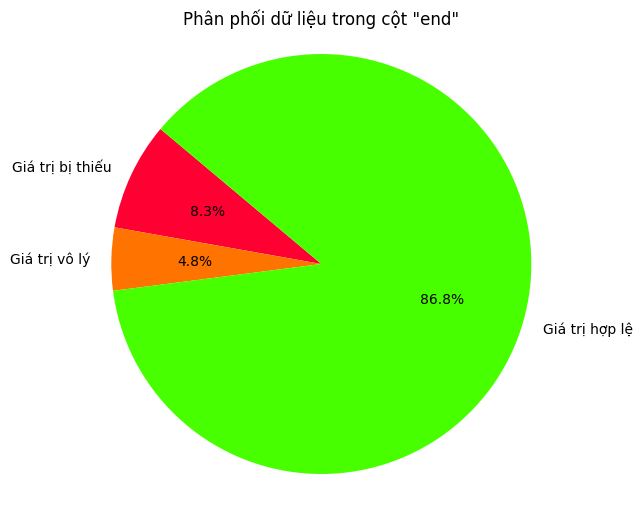

In [ ]:
# Tính số lượng mẫu hợp lệ
total_samples = len(course_info)
valid_samples = total_samples - count_null_values - count_end_greater_than_2018

# Tạo dữ liệu cho biểu đồ tròn
labels = ['Giá trị bị thiếu', 'Giá trị vô lý', 'Giá trị hợp lệ']
sizes = [count_null_values, count_end_greater_than_2018, valid_samples]
colors = ['#ff0033', '#ff7300', '#48ff00'] # Màu sắc cho từng vùng

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối dữ liệu trong cột "end"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


**Vậy tổng giá trị không hợp lệ của cột 'end' là 8.3% + 4.1% = 12.4%**

=> Cột end cần được xử lý trước khi sử dụng

##Kết hợp start và end

In [ ]:

# Giả sử bạn đã có DataFrame df và đã chuyển đổi cột 'start' và 'end' thành datetime
course_info['start'] = pd.to_datetime(course_info['start'])
course_info['end'] = pd.to_datetime(course_info['end'])

# Vấn đề 1: Tạo các điều kiện lọc
condition_1 = course_info['start'] < pd.Timestamp('2015-01-01')
condition_2 = course_info['start'] > pd.Timestamp('2017-08-31')

# Vấn đề 2: Tính số lượng mẫu có giá trị trong cột 'end' lớn hơn năm 2018
condition_3 = course_info['end'].dt.year > 2018

# Vấn đề 3: Tính số lượng giá trị null trong cột 'end'
condition_4 = course_info['end'].isnull()

# Vấn đề 4: Các mẫu bên cột 'end' có thời gian nhỏ hơn cột 'start' (chỉ tính những cột 'end' không bị Null)
condition_5 = (~course_info['end'].isnull()) & (course_info['end'] < course_info['start'])

# Tổng hợp các điều kiện
combined_condition = condition_1 | condition_2 | condition_3 | condition_4 | condition_5

# Đếm số lượng mẫu mắc ít nhất một trong các vấn đề
problematic_samples_count = course_info[combined_condition].shape[0]

print("Số lượng mẫu mắc ít nhất một trong các vấn đề là:", problematic_samples_count)

Số lượng mẫu mắc ít nhất một trong các vấn đề là: 1417


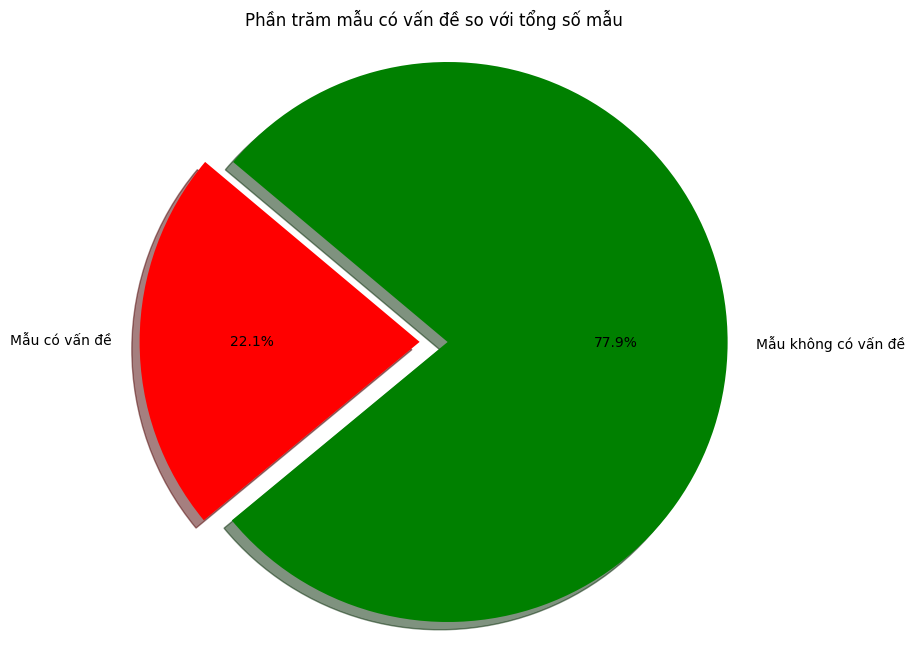

In [ ]:
# Đếm tổng số mẫu trong DataFrame
total_samples_count = course_info.shape[0]

# Tính toán phần trăm
problematic_percentage = (problematic_samples_count / total_samples_count) * 100
non_problematic_percentage = 100 - problematic_percentage

# Dữ liệu cho biểu đồ tròn
labels = ['Mẫu có vấn đề', 'Mẫu không có vấn đề']
sizes = [problematic_percentage, non_problematic_percentage]
colors = ['red', 'green']
explode = (0.1, 0)  # Tách phần 'Mẫu có vấn đề' ra một chút

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn

plt.title('Phần trăm mẫu có vấn đề so với tổng số mẫu')
plt.show()

##Thời gian học của mỗi khóa học

In [ ]:
filtered_data = course_info.loc[~combined_condition]
filtered_data['duration'] = filtered_data['end'] - filtered_data['start']
print("Số lượng data sau khi lọc", len(filtered_data))
filtered_data.head()

Số lượng data sau khi lọc 4993


<ipython-input-23-cbb8bdc1a3af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['duration'] = filtered_data['end'] - filtered_data['start']


,id,course_id,start,end,course_type,category,duration
0,6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN,45 days 15:30:00
1,5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN,180 days 00:00:00
3,8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN,122 days 05:00:00
6,9953,course-v1:ChongqingUniversity+CQUMOOCMSE21202-...,2017-02-19 10:30:00,2017-05-15 00:00:00,0,NaN,84 days 13:30:00
9,8833,course-v1:global_TsinghuaX+70120073X+sp,2016-09-12 10:00:00,2017-01-16 10:00:00,0,NaN,126 days 00:00:00


In [ ]:
# Tính toán số tháng từ cột 'duration'
filtered_data['duration'] = filtered_data['duration'].dt.total_seconds() / (30.44 * 24 * 3600)

<ipython-input-24-b7367b630f85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['duration'] = filtered_data['duration'].dt.total_seconds() / (30.44 * 24 * 3600)


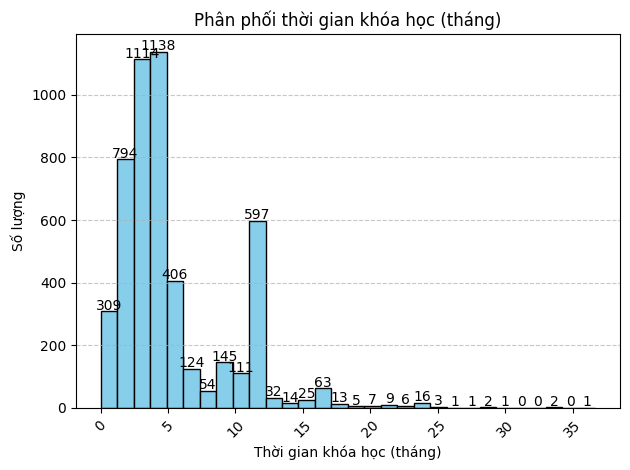

In [ ]:

# Tính số lượng mẫu trong mỗi bin
counts, bins, _ = plt.hist(filtered_data['duration'], bins=30, color='skyblue', edgecolor='black')

# Thêm nhãn giá trị trên cột
for i, count in enumerate(counts):
    plt.text(bins[i] + 0.5 * (bins[i + 1] - bins[i]), count + 5, str(int(count)), ha='center')

plt.title('Phân phối thời gian khóa học (tháng)')
plt.xlabel('Thời gian khóa học (tháng)')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Nhận xét:**

Các khóa học có thời lượng rải rác các giá trị từ lên đến hơn 35 tháng.

Khoảng xuất hiện phổ biến nhất là trong khoảng từ 1 đến 17 tháng.

##course_type

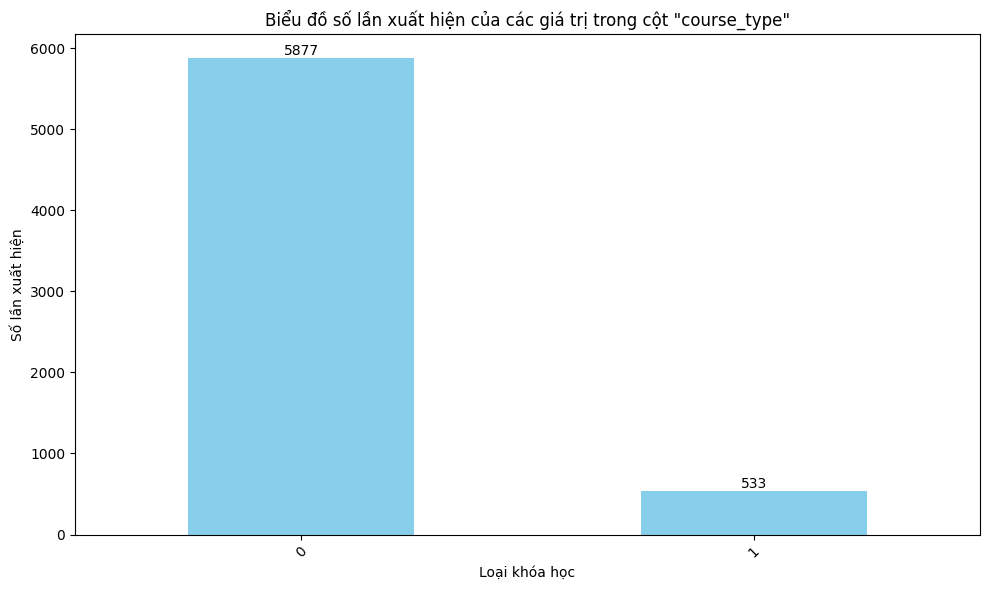

In [ ]:
# Tính số lần xuất hiện của mỗi giá trị trong cột 'course_type'
course_type_counts = course_info['course_type'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = course_type_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ số lần xuất hiện của các giá trị trong cột "course_type"')
plt.xlabel('Loại khóa học')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45)  # Xoay nhãn x để tránh trùng lắp

# Hiển thị giá trị trên từng cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()  # Đảm bảo không bị cắt những phần của biểu đồ
plt.show()

Trường thông tin **course_type** là thông tin về chế độ học của khóa học. Nó chỉ bao gồm 2 giá trị số nguyên là 0 và 1 (với 0 là khóa học theo tốc độ của người hướng dẫn và 1 là khóa học theo nhịp độ riêng).

=> Sự khác biệt giữa hai loại giá trị này là rất đáng kể: Giá trị 0 cao hơn giá trị 1 khoảng 10 lần. Điều này tác động mạnh mẽ đến quá trình phân tích và dự đoán, đặc biệt trong việc đánh giá khả năng bỏ học của học viên. Sự mất cân bằng này có thể khiến mô hình không học được đúng mối quan hệ giữa các biến và kết quả, từ đó làm giảm độ chính xác của dự đoán. Do đó, cần xem xét kỹ lưỡng để đảm bảo tính toàn diện và độ tin cậy của quá trình phân tích và dự đoán.

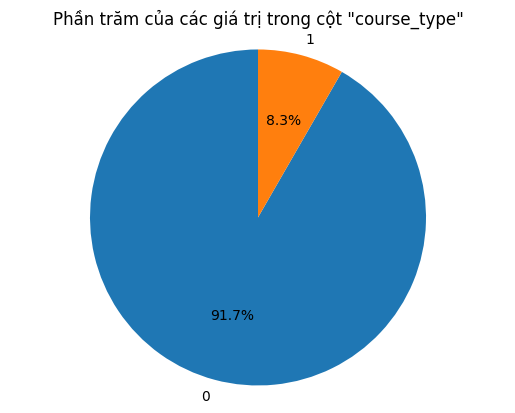

In [ ]:
#Tính toán phần trăm của từng giá trị
course_type_counts = course_info['course_type'].value_counts()
course_type_percentages = course_type_counts / course_type_counts.sum() * 100


plt.pie(course_type_percentages, labels=course_type_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Phần trăm của các giá trị trong cột "course_type"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**  

Sự chênh lệch lớn giữa số lượng giá trị 0 và 1 trong trường "course_type" có thể gây ra:  

- **Thiên lệch dữ liệu:** Mô hình khó học đúng mối quan hệ do nhóm có số lượng lớn (giá trị 0) lấn át.  
- **Mất cân bằng mô hình:** Mô hình dễ dự đoán sai lệch theo lớp chiếm ưu thế, làm giảm hiệu quả với lớp thiểu số.  

##categorty

In [ ]:
print("Số lượng mẫu thiếu dữ liệu ở cột category")
course_info.category.isnull().sum()

Số lượng mẫu thiếu dữ liệu ở cột category


4956

Phần trăm giá trị bị thiếu trong cột 'category': 77.3%


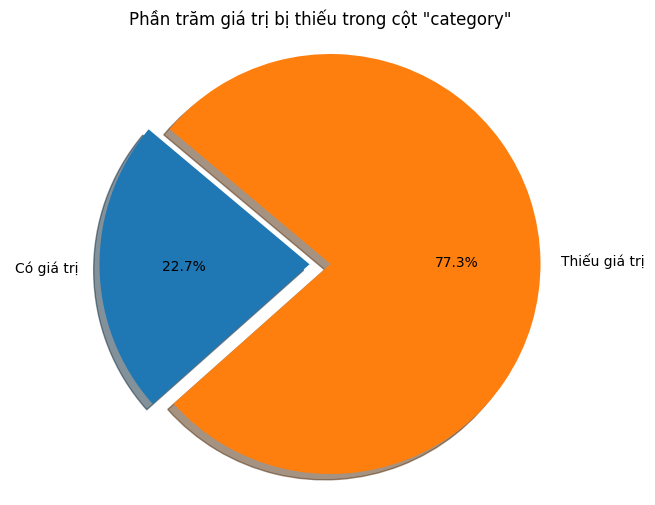

In [ ]:
# Tính phần trăm giá trị bị thiếu trong cột "category"
missing_percentage = course_info['category'].isna().mean() * 100

print(f"Phần trăm giá trị bị thiếu trong cột 'category': {missing_percentage:.1f}%")
import matplotlib.pyplot as plt

# Tạo mảng dữ liệu cho biểu đồ tròn
labels = ['Có giá trị', 'Thiếu giá trị']
sizes = [100 - missing_percentage, missing_percentage]
colors = ['#1f77b4', '#ff7f0e']  # Chọn màu sắc
explode = (0, 0.1)  # Nổi bật phần "Thiếu giá trị"

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Phần trăm giá trị bị thiếu trong cột "category"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**  

Cột "category" có tỷ lệ dữ liệu thiếu vượt gần ba lần so với dữ liệu đầy đủ, ảnh hưởng lớn đến tính toàn vẹn của bộ dữ liệu và quá trình dự đoán. Thông tin này rất quan trọng để hiểu sự tương tác giữa học viên và nội dung học, nên việc xử lý dữ liệu thiếu là cần thiết để đảm bảo độ chính xác và hiệu quả của mô hình dự đoán.  

In [ ]:
course_info.category.value_counts()

,count
category,
computer,173
economics,161
engineering,112
art,95
foreign language,89
business,88
social science,86
history,84
math,82


In [ ]:
course_info.category.nunique()

18

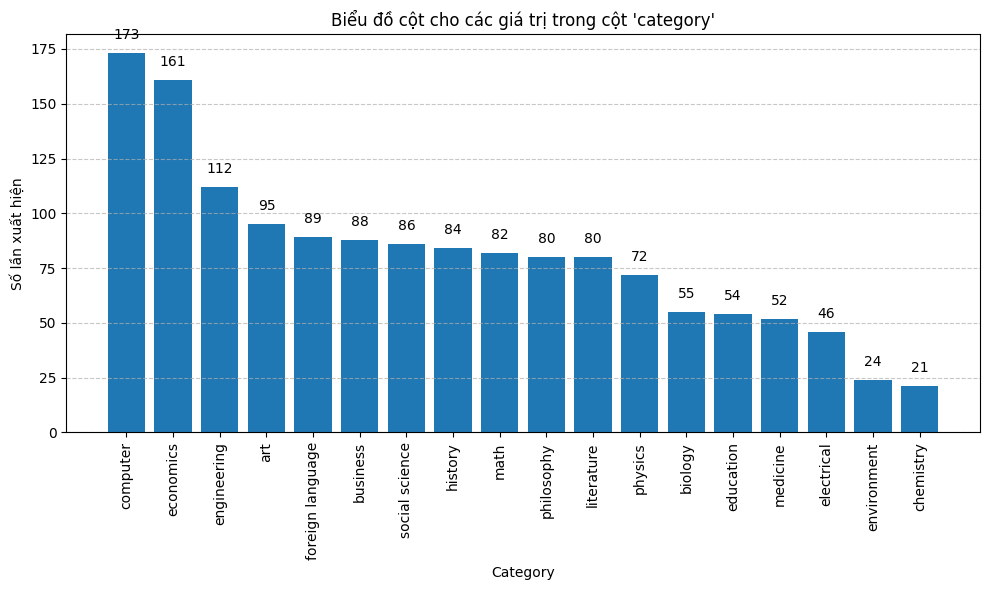

In [ ]:
category_counts = course_info['category'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values) # Lưu trữ các cột để sử dụng sau
plt.xlabel("Category")
plt.ylabel("Số lần xuất hiện")
plt.title("Biểu đồ cột cho các giá trị trong cột 'category'")
plt.xticks(rotation=90)
plt.tight_layout()

# Thêm giá trị trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới dọc

plt.show()

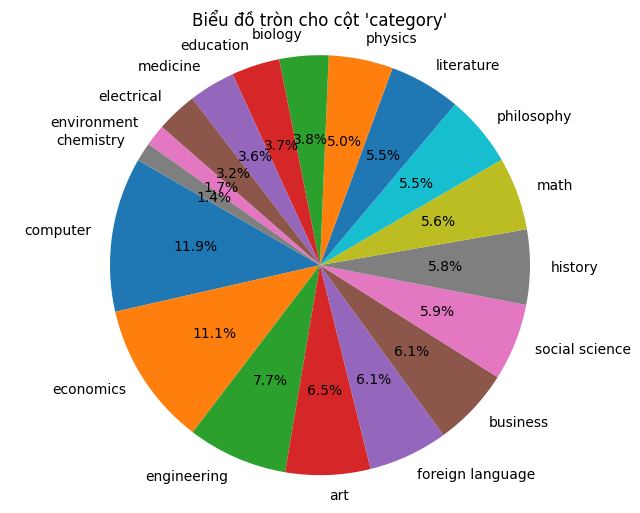

In [ ]:

category_counts = course_info['category'].value_counts()

# Tính toán phần trăm
category_percentages = category_counts / category_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước (nếu cần)
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=150)
plt.title("Biểu đồ tròn cho cột 'category'")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

Các lĩnh vực khóa học rất đa dạng, từ công nghệ thông tin (computer), kinh tế (economics), kỹ thuật (engineering) đến nghệ thuật, ngôn ngữ, và khoa học xã hội. Một số lĩnh vực như computer, economics, và engineering có số lượng khóa học vượt trội, phản ánh nhu cầu cao trên thị trường lao động. Ngược lại, các lĩnh vực như environment và chemistry có ít khóa học hơn, có thể do tính chuyên sâu và ít phổ biến. Phân bố không đồng đều này có thể ảnh hưởng đến việc phân tích và dự đoán khả năng bỏ học của học viên.

**Nhận xét:**  

Trường "category" có sự chênh lệch giữa các giá trị, nhưng không quá lớn. Giá trị phổ biến nhất, "computer," chiếm 11.9% tổng mẫu, trong khi giá trị thấp nhất chỉ chiếm 1.4% (21 mẫu). Dù chênh lệch này không đáng kể, nó vẫn có thể ảnh hưởng đến dự đoán khả năng bỏ học.  

Ngoài ra, việc thiếu dữ liệu ở trường này cũng ảnh hưởng đến độ chính xác của phân tích và dự đoán, đòi hỏi cần xử lý cẩn thận để đảm bảo kết quả đáng tin cậy.  

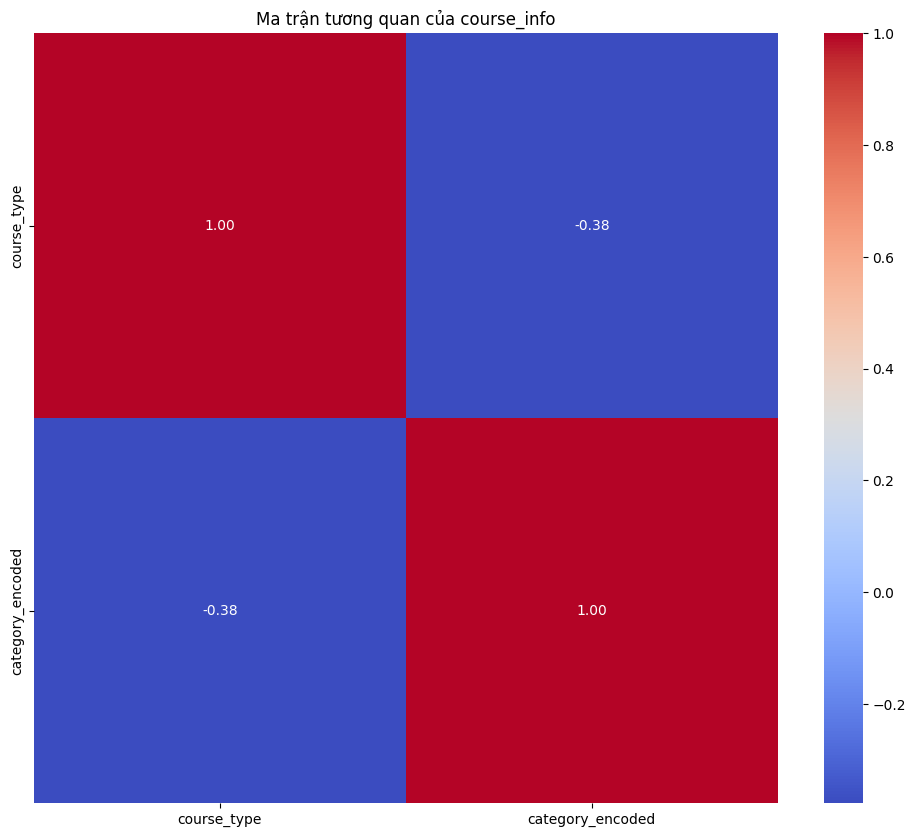

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho cột 'category'
course_info['category_encoded'] = label_encoder.fit_transform(course_info['category'])

# Chọn ra các cột có kiểu dữ liệu là số (int64 hoặc float64)
numeric_columns = course_info.select_dtypes(include=['int64', 'float64'])

# Tính toán ma trận tương quan
correlation_matrix = numeric_columns.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))  # Điều chỉnh kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan của course_info")
plt.show()

**Nhận xét:**  

- Giá trị tương quan -0.38 giữa "course_type" và "category_encoded" cho thấy một mối tương quan âm vừa phải. "Course_type" phản ánh chế độ học, còn "category_encoded" biểu diễn lĩnh vực khóa học.  

- Mức độ tương quan âm này gợi ý rằng một số chế độ học (ví dụ: tự học hoặc học với giảng viên) có thể được ưu tiên hơn trong một số lĩnh vực nhất định, phù hợp với đặc điểm của lĩnh vực đó.  

- Tuy mức tương quan không quá mạnh, nhóm quyết định giữ lại cả hai biến để phân tích thêm và xây dựng mô hình dự đoán. Điều này đảm bảo khai thác đầy đủ thông tin và hỗ trợ đánh giá mối quan hệ giữa các yếu tố trong dữ liệu.  

#user_info

In [ ]:
user_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/user_info.csv')

In [ ]:
user_info.head(10)

,user_id,gender,education,birth
0,631,male,High,1997.0
1,2631,male,Bachelor's,1990.0
2,4231,male,Associate,1991.0
3,6031,male,Bachelor's,1988.0
4,7831,NaN,NaN,NaN
5,9631,male,Bachelor's,1992.0
6,11231,male,Associate,1985.0
7,13631,NaN,NaN,NaN
8,16031,male,Master's,1986.0
9,18231,male,Bachelor's,1987.0


In [ ]:
user_info.shape

(9627148, 4)

In [ ]:
user_info.dtypes

,0
user_id,int64
gender,object
education,object
birth,float64


In [ ]:
user_info.isnull().sum()

,0
user_id,0
gender,8420796
education,9298955
birth,9145726


##gender


In [ ]:
user_info.gender.isnull().sum()

8420796

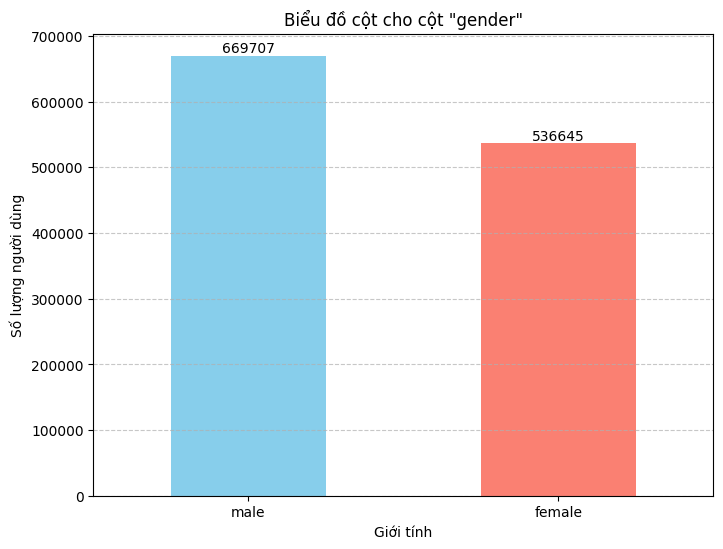

In [ ]:
# Tính toán số lượng người dùng cho mỗi giới tính
gender_counts = user_info['gender'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Biểu đồ cột cho cột "gender"')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng người dùng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới dọc

# Thêm giá trị trên mỗi cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

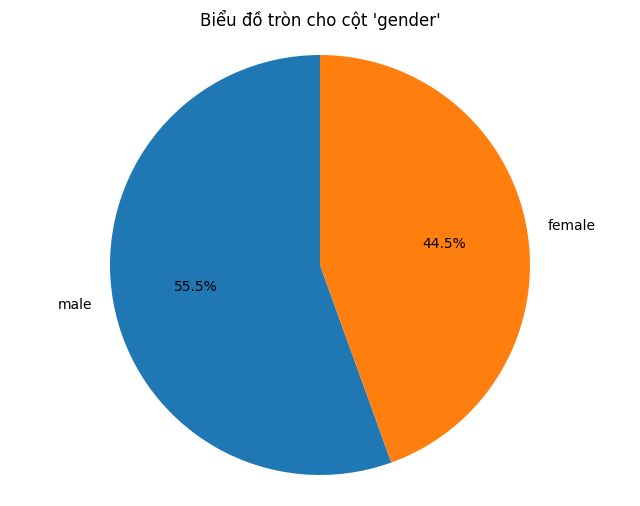

In [ ]:


# Tính toán phần trăm cho mỗi giới tính
gender_percentages = gender_counts / gender_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước (nếu cần)
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title("Biểu đồ tròn cho cột 'gender'")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

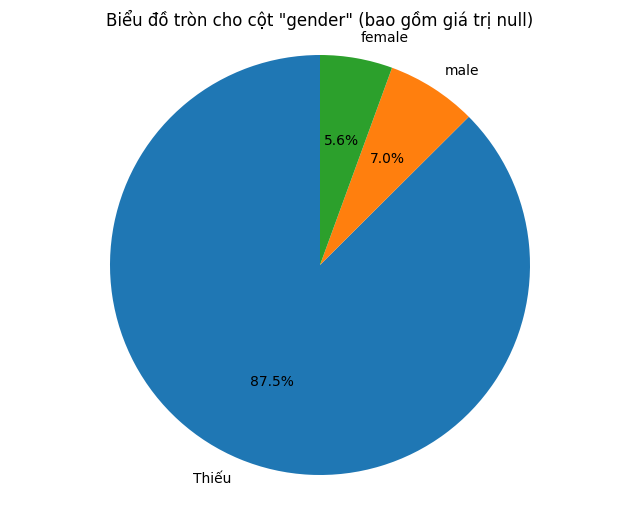

In [ ]:

# Tính toán số lượng giá trị null và giá trị khác
gender_counts = user_info['gender'].value_counts(dropna=False)

# Tạo nhãn cho biểu đồ
labels = gender_counts.index.tolist()
# Thay thế NaN bằng 'Thiếu' để hiển thị rõ hơn trên biểu đồ
labels = ['Thiếu' if pd.isnull(x) else x for x in labels]

# Tính toán phần trăm cho mỗi giá trị
gender_percentages = gender_counts / gender_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(gender_percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ tròn cho cột "gender" (bao gồm giá trị null)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**

- Khoảng 55.5% và "female" chiếm khoảng 44.5%. Điều này tạo ra một sự phân phối khá cân đối giữa hai giới tính.

- Tuy nhiên, khi xem xét toàn bộ dữ liệu, 87.5% thuộc nhóm "Thiếu", nghĩa là phần lớn dữ liệu không có giá trị trong cột gender.
Đây là tỷ lệ rất cao, cần được xem xét để xử lý, đặc biệt nếu giới tính là một biến quan trọng trong phân tích.

- Mặc dù cột "**gender**" có thể cung cấp thông tin quan trọng về phân phối giới tính trong mẫu dữ liệu, việc có một tỷ lệ lớn giá trị bị thiếu có thể giảm đi khả năng của cột này trong việc phân tích hoặc dự đoán.

##education

In [ ]:
user_info.education.isnull().sum()

9298955

In [ ]:
user_info.education.value_counts()

,count
education,
Bachelor's,172616
Master's,53988
High,48637
Associate,36955
Doctorate,8252
Middle,6308
Primary,1437


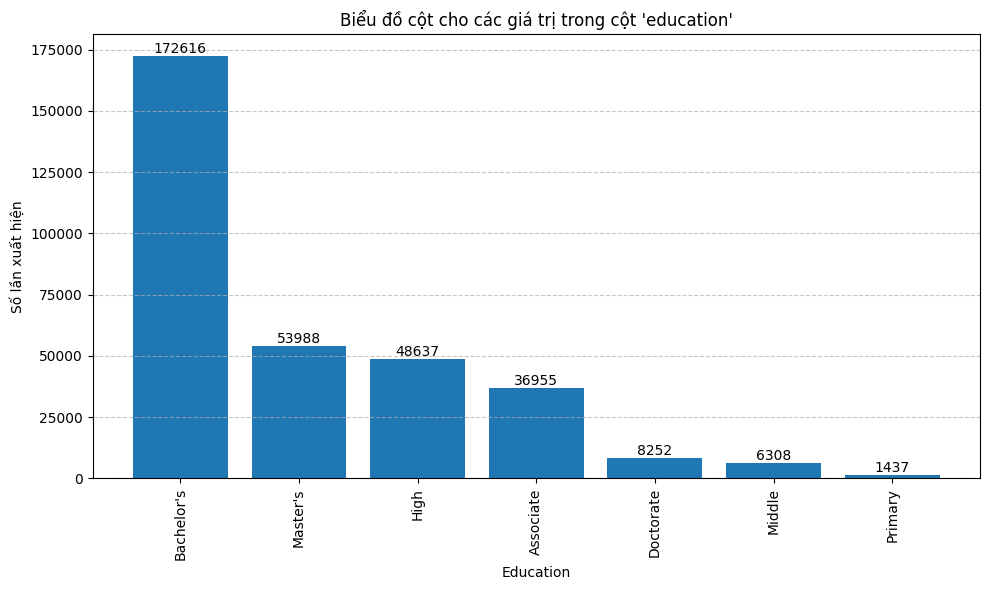

In [ ]:
education_counts = user_info['education'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(education_counts.index, education_counts.values) # Lưu trữ các cột để sử dụng sau
plt.xlabel("Education")
plt.ylabel("Số lần xuất hiện")
plt.title("Biểu đồ cột cho các giá trị trong cột 'education'")
plt.xticks(rotation=90)
plt.tight_layout()

# Thêm giá trị trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới dọc

plt.show()

**Tổng quan:** Sự phân bố các giá trị là không đồng đều, rất mất cân bằng.

Dữ liệu tập trung chủ yếu ở nhóm trình độ cao (Cử nhân, Thạc sĩ), cho thấy đây có thể là một tập dữ liệu liên quan đến các đối tượng có học vấn cao.
Các nhóm như "Primary" và "Middle" rất nhỏ, điều này có thể phản ánh rằng nhóm đối tượng có học vấn thấp không được thu thập đầy đủ hoặc không thuộc trọng tâm phân tích.

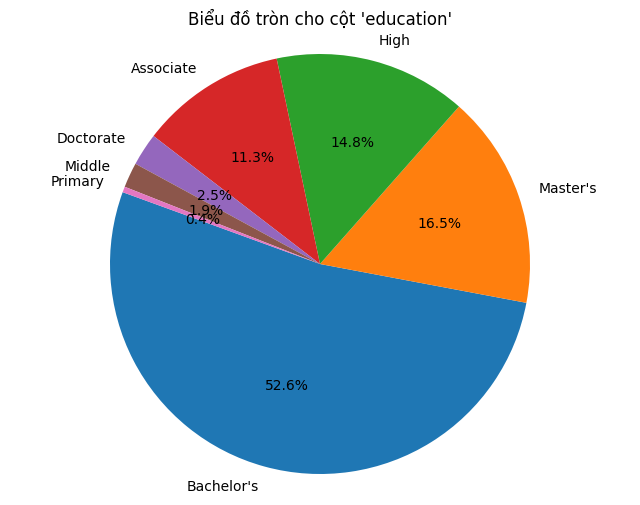

In [ ]:

# Tính toán phần trăm
education_percentages = education_counts / education_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước (nếu cần)
plt.pie(education_percentages, labels=education_percentages.index, autopct='%1.1f%%', startangle=160)
plt.title("Biểu đồ tròn cho cột 'education'")
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

education
NaN           96.590963
Bachelor's     1.793013
Master's       0.560789
High           0.505207
Associate      0.383862
Doctorate      0.085716
Middle         0.065523
Primary        0.014927
Name: count, dtype: float64


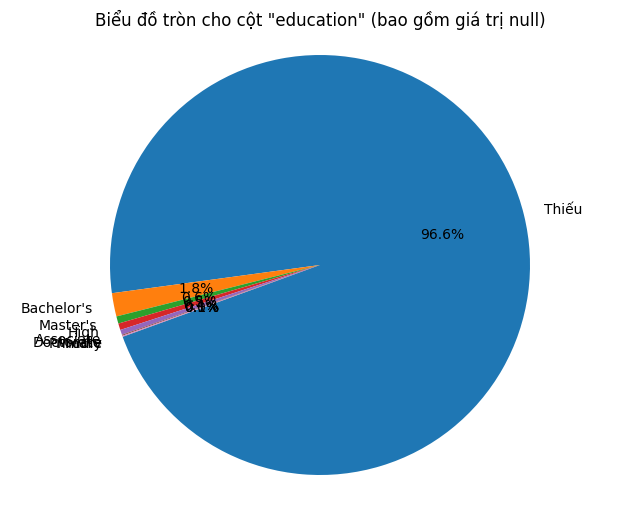

In [ ]:
# Tính toán số lượng giá trị null và giá trị khác
education_counts = user_info['education'].value_counts(dropna=False)

# Tạo nhãn cho biểu đồ
labels = education_counts.index.tolist()
# Thay thế NaN bằng 'Thiếu' để hiển thị rõ hơn trên biểu đồ
labels = ['Thiếu' if pd.isnull(x) else x for x in labels]

# Tính toán phần trăm cho mỗi giá trị
education_percentages = education_counts / education_counts.sum() * 100
print(education_percentages)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(education_percentages, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Biểu đồ tròn cho cột "education" (bao gồm giá trị null)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**  

Với 96.6% giá trị bị thiếu, cột "education" gần như không có tính khả thi và đáng tin cậy cho quá trình phân tích. Sự thiếu hụt nghiêm trọng này có thể làm giảm độ chính xác của phân tích và dự đoán, dẫn đến kết quả không đáng tin cậy.  

##birth

In [ ]:
user_info.birth.isnull().sum()

9145726

In [ ]:
user_info.birth.value_counts()

,count
birth,
1994.0,51679
1995.0,50107
1993.0,44488
1996.0,41856
1992.0,33855
...,...
1910.0,1
7381.0,1
1908.0,1


In [ ]:
user_info.birth.describe()

,birth
count,481422.000000
mean,1990.901448
std,10.714057
min,996.000000
25%,1989.000000
50%,1993.000000
75%,1995.000000
max,7381.000000


**Nhận xét:**  

Cột **"birth"** chứa các giá trị không hợp lệ với min là 996.0 và max là 7381.0. Những giá trị không hợp lệ này có thể xuất phát từ lỗi nhập liệu hoặc quá trình thu thập dữ liệu. Điều này có thể ảnh hưởng đến tính chính xác và khả năng khái quát của phân tích dữ liệu.

In [ ]:
# Thống kê số lượng mẫu có giá trị nhỏ hơn 1920 hoặc lớn hơn 2015 trong cột 'birth'
outlier_count = ((user_info['birth'] < 1920) | (user_info['birth'] > 2015)).sum()

print("Số lượng mẫu có giá trị nhỏ hơn 1920 hoặc lớn hơn 2015:", outlier_count)

Số lượng mẫu có giá trị nhỏ hơn 1920 hoặc lớn hơn 2015: 345


Nhóm quyết định lấy khoảng giá trị hợp lệ trong cột **"birth"** là từ 1920 đến 2015.

**Nhận xét:** Số lượng giá trị không hợp lệ là 345. Đây là một con số rất nhỏ so với tổng số lượng mẫu của bộ dữ liệu.

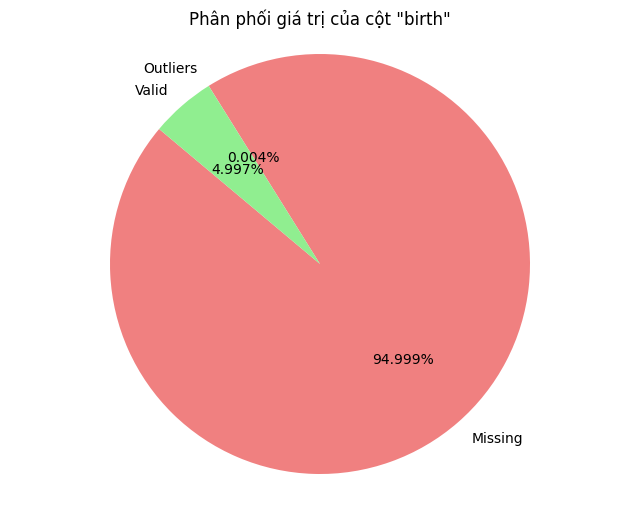

In [ ]:
# Thống kê số lượng giá trị bị thiếu
missing_count = user_info['birth'].isnull().sum()


# Tính toán số lượng giá trị hợp lệ
total_samples = len(user_info)
valid_count = total_samples - missing_count - outlier_count

# Tính phần trăm của mỗi loại giá trị
percentages = [missing_count/total_samples*100, outlier_count/total_samples*100, valid_count/total_samples*100]
labels = ['Missing', 'Outliers', 'Valid']
colors = ['lightcoral', 'lightblue', 'lightgreen']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Phân phối giá trị của cột "birth"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**  

Với 94.999% giá trị bị thiếu trong cột "birth," tỷ lệ này rất cao và có thể gây ra những thách thức lớn trong quá trình phân tích và dự đoán dựa trên dữ liệu. Cột này có thể ảnh hưởng nghiêm trọng đến quá trình dự đoán do số lượng mẫu rất lớn và tỷ lệ giá trị bị thiếu quá cao.

#train_truth


In [ ]:
train_truth = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/train_truth.csv')

In [ ]:
train_truth.head(5)

,enroll_id,truth
0,772,1
1,773,1
2,774,1
3,776,0
4,777,1


In [ ]:
train_truth.shape

(157943, 2)

In [ ]:
train_truth.isnull().sum()

,0
enroll_id,0
truth,0


##truth

In [ ]:
train_truth.truth.value_counts()

,count
truth,
1,119817
0,38126


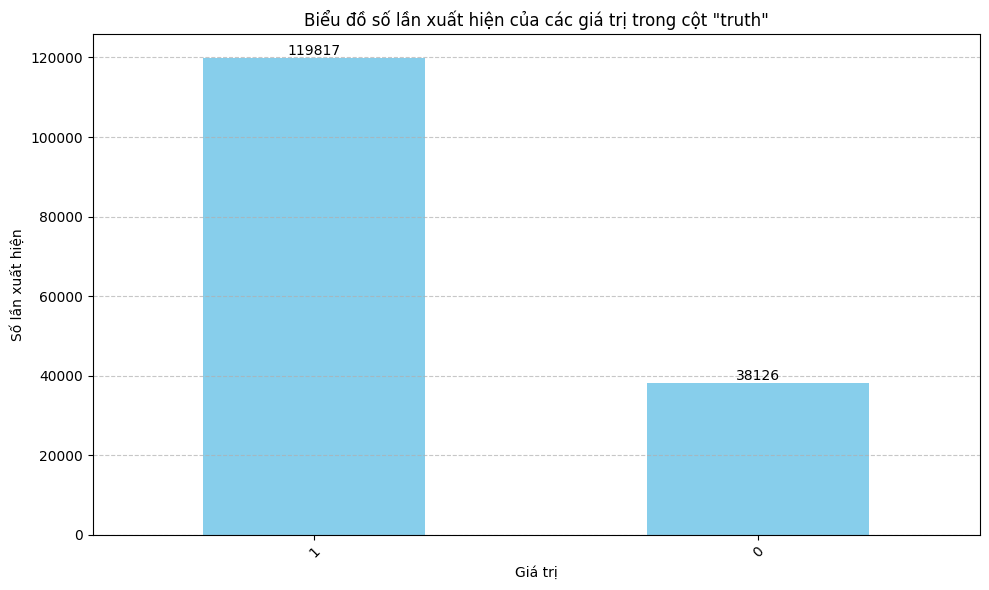

In [ ]:
# Tính số lần xuất hiện của mỗi giá trị trong cột 'course_type'
truth_counts = train_truth['truth'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = truth_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ số lần xuất hiện của các giá trị trong cột "truth"')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45)  # Xoay nhãn x để tránh trùng lắp
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới dọc

# Hiển thị giá trị trên từng cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()  # Đảm bảo không bị cắt những phần của biểu đồ
plt.show()

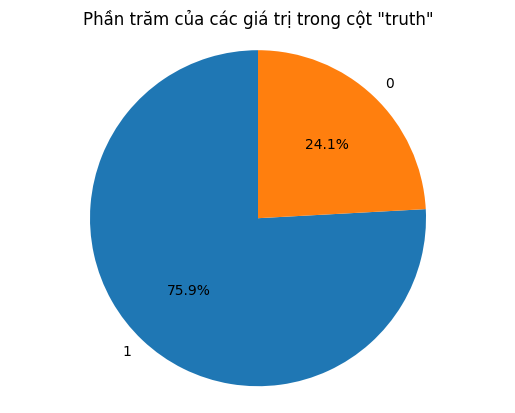

In [ ]:
#Tính toán phần trăm của từng giá trị
truth_counts_percentages = truth_counts / truth_counts.sum() * 100


plt.pie(truth_counts_percentages, labels=truth_counts_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Phần trăm của các giá trị trong cột "truth"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Nhận xét:**  

Sự phân bố của cột "truth" cho thấy một sự mất cân đối rõ rệt giữa hai giá trị. Với 75.9% cho giá trị 1, có sự chệch lệch đáng kể giữa hai lớp. Điều này có thể ảnh hưởng đến hiệu suất của mô hình dự đoán, đặc biệt trong các bài toán phân loại như dự đoán khả năng bỏ học, vì mô hình có thể dễ bị chệch hướng hơn về dự đoán lớp có tỷ lệ lớn hơn.

#train_log

In [ ]:
train_log = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/train_log.csv')

In [ ]:
train_log.head(5)

,enroll_id,username,course_id,session_id,action,object,time
0,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,NaN,2015-09-27T15:42:59
1,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,NaN,2015-09-27T15:43:12
2,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:37:42
3,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:27
4,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:30


In [ ]:
train_log.shape

(29165540, 7)

In [ ]:
train_log.isnull().sum()

,0
enroll_id,0
username,0
course_id,0
session_id,0
action,0
object,7695279
time,0


**=> Chỉ có mỗi cột 'object' là sự phản hồi hành động của học viên bị thiếu giá trị**

In [ ]:
train_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165540 entries, 0 to 29165539
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   enroll_id   int64 
 1   username    int64 
 2   course_id   object
 3   session_id  object
 4   action      object
 5   object      object
 6   time        object
dtypes: int64(2), object(5)
memory usage: 1.5+ GB


##enroll_id

In [ ]:
train_log.enroll_id.value_counts()

,count
enroll_id,
191581,128992
82054,67953
426973,58917
87515,56494
428257,47182
...,...
307469,1
307479,1
274142,1


In [ ]:
train_log.enroll_id.nunique()

157943

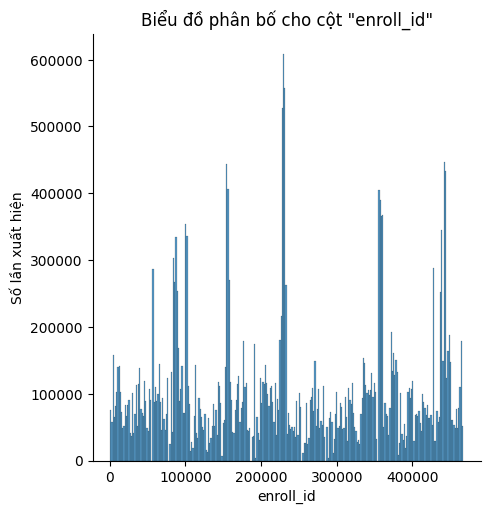

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân bố
sns.displot(train_log['enroll_id'], kde=False)
plt.title('Biểu đồ phân bố cho cột "enroll_id"')
plt.xlabel('enroll_id')
plt.ylabel('Số lần xuất hiện')
plt.show()

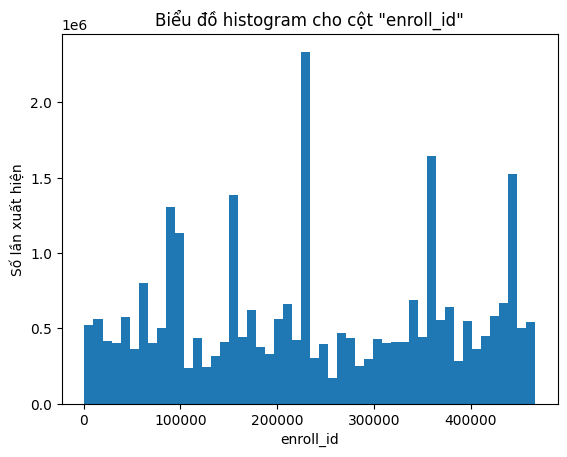

In [ ]:

# Vẽ biểu đồ histogram
plt.hist(train_log['enroll_id'], bins=50) # Điều chỉnh bins để thay đổi số lượng cột
plt.title('Biểu đồ histogram cho cột "enroll_id"')
plt.xlabel('enroll_id')
plt.ylabel('Số lần xuất hiện')
plt.show()

In [ ]:
# # Đếm số lượng mẫu cho mỗi giá trị trong cột "enroll_id"
# enroll_id_counts = train_log['enroll_id'].value_counts()

# # Vẽ biểu đồ cột
# plt.figure(figsize=(10, 6))
# enroll_id_counts.plot(kind='bar')
# plt.xlabel('enroll_id')
# plt.ylabel('Số lượng mẫu')
# plt.title('Số lượng mẫu cho mỗi giá trị của enroll_id')
# plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để hiển thị dễ đọc hơn

# plt.tight_layout()
# plt.show()

##course_id

In [ ]:
train_log.course_id.nunique()

247

**=> Tập train có tổng cộng 247 khóa học**

In [ ]:
train_log.course_id.value_counts()

,count
course_id,
course-v1:TsinghuaX+10610224X+2016_T1,1955130
course-v1:TsinghuaX+10610183_2X+2016_T2,1410371
course-v1:TsinghuaX+30640014+2016_T2,1245965
course-v1:TsinghuaX+10610224X+2017_T1,1194954
course-v1:TsinghuaX+10610204X_2015_2+2015_T2,1013470
...,...
UQx/Write101_x/_,13498
course-v1:HIT+13SC20301820+2015_T2,12347
course-v1:TsinghuaX+30150303X+2015_T2,12338


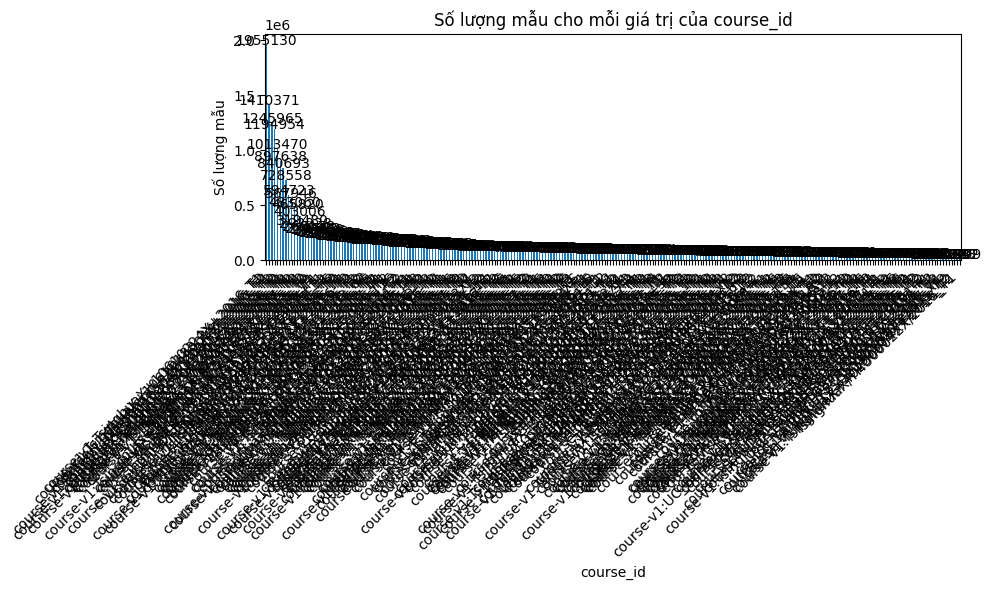

In [ ]:
# Đếm số lượng mẫu cho mỗi giá trị trong cột "course_id"
course_id_counts = train_log['course_id'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
course_id_counts.plot(kind='bar')
plt.xlabel('course_id')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi giá trị của course_id')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để hiển thị dễ đọc hơn
# Hiển thị giá trị số lượng mẫu trên mỗi cột
for i, value in enumerate(course_id_counts.values):
    plt.text(i, value + 5, str(value), ha='center')
plt.tight_layout()
plt.show()

course_id
course-v1:TsinghuaX+10610224X+2016_T1           1955130
course-v1:TsinghuaX+10610183_2X+2016_T2         1410371
course-v1:TsinghuaX+30640014+2016_T2            1245965
course-v1:TsinghuaX+10610224X+2017_T1           1194954
course-v1:TsinghuaX+10610204X_2015_2+2015_T2    1013470
                                                 ...   
UQx/Write101_x/_                                  13498
course-v1:HIT+13SC20301820+2015_T2                12347
course-v1:TsinghuaX+30150303X+2015_T2             12338
course-v1:TsinghuaX+40250074X+2016_T2             12042
TsinghuaX/THU00022X/2015_T1                       11909
Name: count, Length: 247, dtype: int64


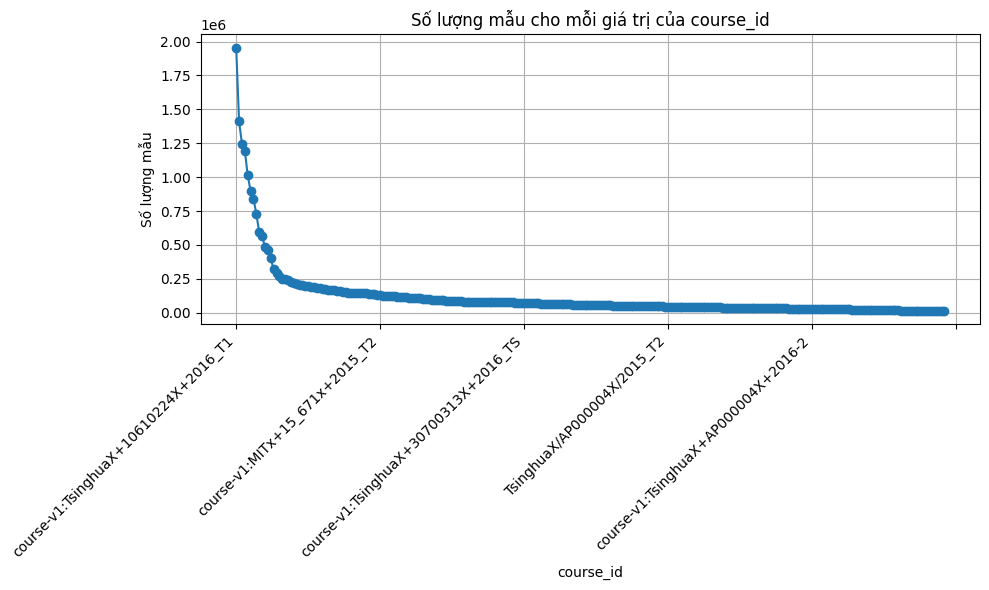

In [ ]:
# Đếm số lượng mẫu cho mỗi giá trị trong cột "course_id"
course_id_counts = train_log['course_id'].value_counts()
print(course_id_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
course_id_counts.plot(kind='line', marker='o')
plt.xlabel('course_id')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi giá trị của course_id')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để hiển thị dễ đọc hơn
plt.grid(True)  # Hiển thị lưới cho biểu đồ

plt.tight_layout()
plt.show()

**Nhận xét:**  

Sự chênh lệch lớn về số lượng tương tác giữa các khóa học được thể hiện rõ trên biểu đồ. Khóa học có số lượng tương tác cao nhất đạt 1,955,130, trong khi khóa học có số lượng tương tác thấp nhất chỉ có 11,909. Sự chênh lệch này phản ánh sự khác biệt về sự phổ biến hoặc tầm quan trọng của các khóa học trong hệ thống. Các yếu tố như chất lượng nội dung, sự phổ biến của chủ đề có thể ảnh hưởng đến mức độ tương tác của các khóa học này.

##action


In [ ]:
train_log.action.nunique()

22

In [ ]:
train_log.action.value_counts()

,count
action,
stop_video,5561410
pause_video,4204205
click_courseware,3978918
play_video,3415575
problem_get,2353346
load_video,2123372
close_courseware,2019214
seek_video,1797010
problem_check,857797


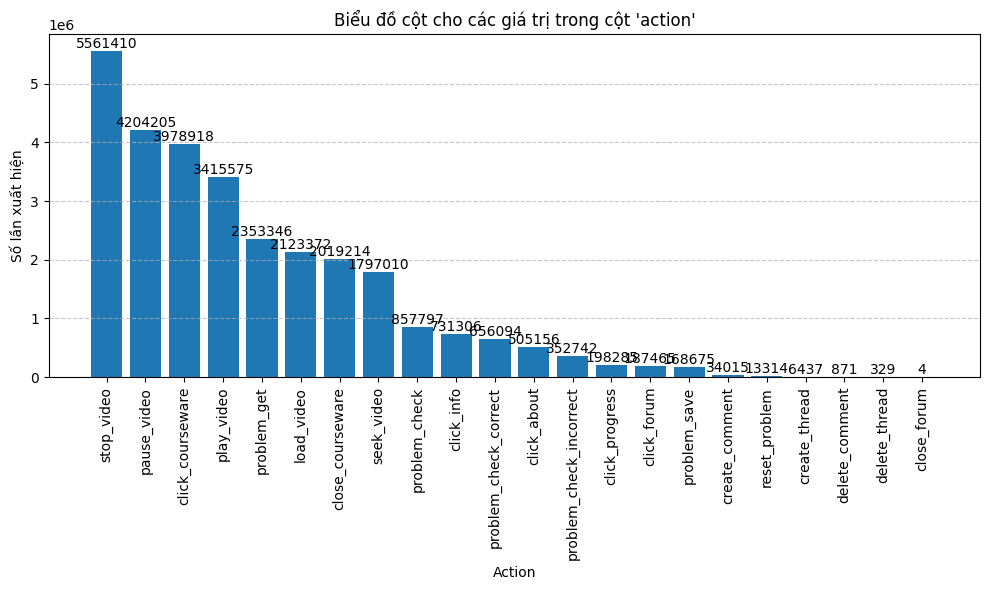

In [ ]:
action_counts = train_log['action'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(action_counts.index, action_counts.values) # Lưu trữ các cột để sử dụng sau
plt.xlabel("Action")
plt.ylabel("Số lần xuất hiện")
plt.title("Biểu đồ cột cho các giá trị trong cột 'action'")
plt.xticks(rotation=90)
plt.tight_layout()

# Thêm giá trị trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới dọc

plt.show()

**Nhận xét:** Sự chênh lệch trong các hoạt động khóa học phản ánh sự đa dạng trong hành vi học tập của học viên. Các hoạt động phổ biến gồm xem video, tương tác nội dung và giải bài tập, trong khi các hoạt động như bình luận hoặc xóa chủ đề ít phổ biến hơn. Sự chênh lệch này cung cấp thông tin quan trọng để hiểu và dự đoán hành vi học tập của học viên, giúp cải thiện dự đoán về khả năng bỏ học.

###Số lượng action

In [ ]:
grouped_data = train_log.groupby(['enroll_id', 'session_id'])['action'].agg(list).reset_index()
grouped_data.head()

,enroll_id,session_id,action
0,772,d8a9b787fa69063c34c73b9c29190b1c,"[click_about, click_info]"
1,773,2f02b86eb3ea2cbf0be11385a8dc62e5,"[pause_video, load_video, play_video, pause_vi..."
2,774,138155092c1a9ce258b0da27a169b14d,"[click_info, click_info, click_courseware, clo..."
3,774,26449d5b9c0dfd76bdf981410ef33d94,"[seek_video, close_courseware, stop_video, pau..."
4,774,fd2ad174b4aa8f6dd3e8900e1ba62735,"[pause_video, seek_video, play_video, pause_vi..."


In [ ]:
grouped_data['count_action'] = grouped_data['action'].apply(len)
print(len(grouped_data))
grouped_data.head()

358922


,enroll_id,session_id,action,count_action
0,772,d8a9b787fa69063c34c73b9c29190b1c,"[click_about, click_info]",2
1,773,2f02b86eb3ea2cbf0be11385a8dc62e5,"[pause_video, load_video, play_video, pause_vi...",21
2,774,138155092c1a9ce258b0da27a169b14d,"[click_info, click_info, click_courseware, clo...",5
3,774,26449d5b9c0dfd76bdf981410ef33d94,"[seek_video, close_courseware, stop_video, pau...",36
4,774,fd2ad174b4aa8f6dd3e8900e1ba62735,"[pause_video, seek_video, play_video, pause_vi...",33


In [ ]:
grouped_data['count_action'].value_counts()

,count
count_action,
4,20174
2,19760
1,15153
3,12178
6,12101
...,...
2295,1
929,1
3179,1


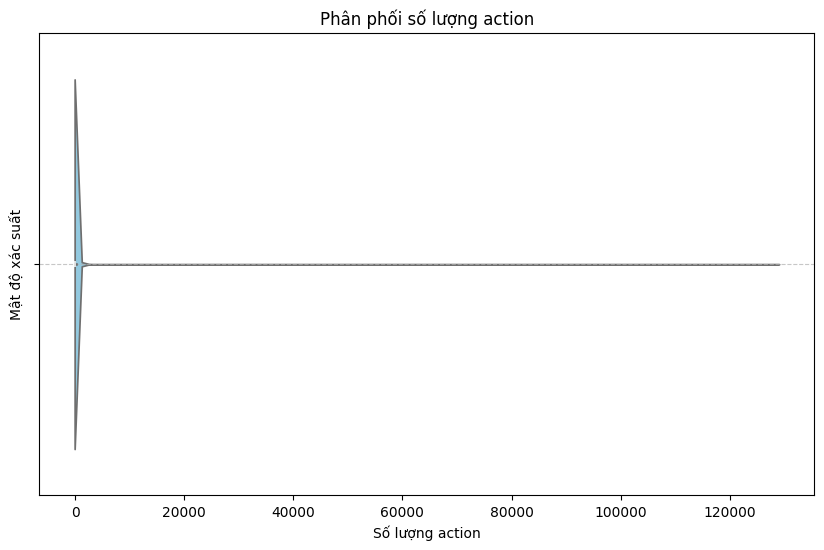

In [ ]:
import seaborn as sns

# Vẽ biểu đồ violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=grouped_data['count_action'], color='skyblue')
plt.title('Phân phối số lượng action')
plt.xlabel('Số lượng action')
plt.ylabel('Mật độ xác suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

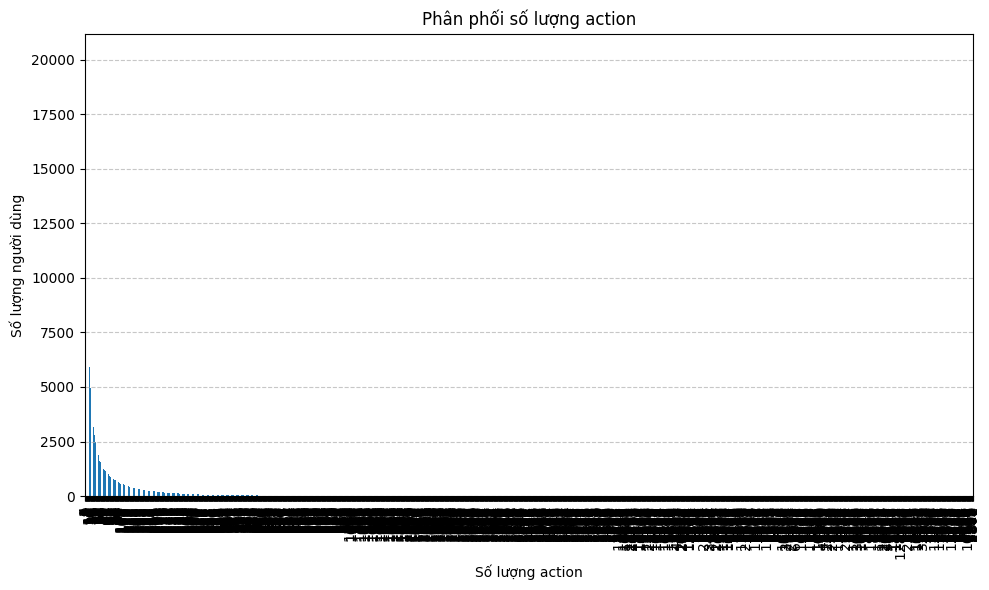

In [ ]:
import matplotlib.pyplot as plt

# Tính toán số lượng đăng ký khóa học theo tháng và năm
action_counts = grouped_data['count_action'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Phân phối số lượng action')
plt.xlabel('Số lượng action')
plt.ylabel('Số lượng người dùng')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Số lượng unique value 65


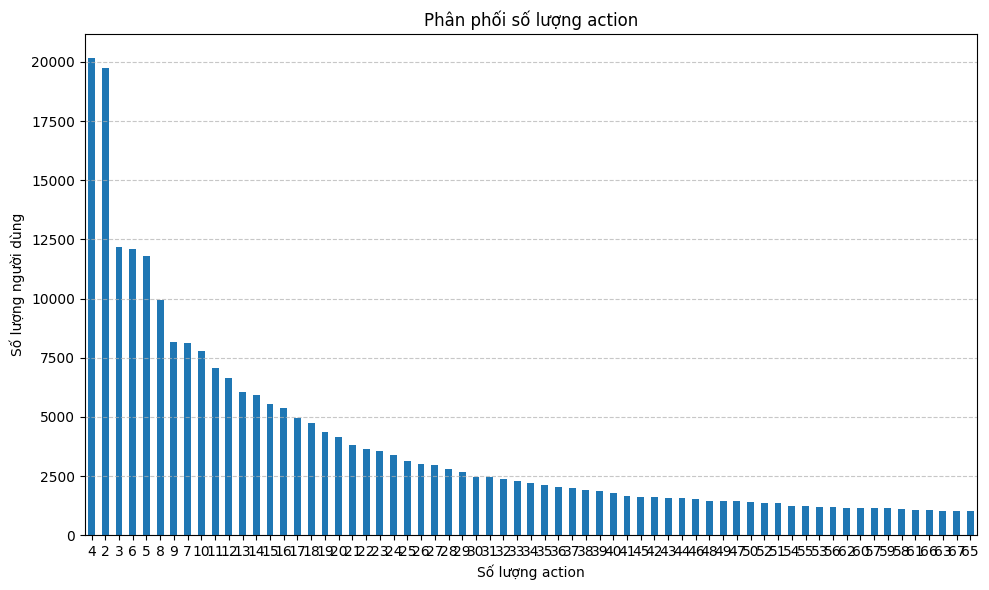

In [ ]:
import matplotlib.pyplot as plt

# Tính toán số lượng đăng ký khóa học theo tháng và năm
action_counts = grouped_data[grouped_data['count_action'] > 1]['count_action'].value_counts()
# Lọc các trường hợp có số lần xuất hiện của số lượng action lớn hơn 1
filtered_action_counts = action_counts[action_counts > 1000]
print("Số lượng unique value", len(filtered_action_counts))
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
filtered_action_counts.plot(kind='bar')
plt.title('Phân phối số lượng action')
plt.xlabel('Số lượng action')
plt.ylabel('Số lượng người dùng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Số lượng unique value 161


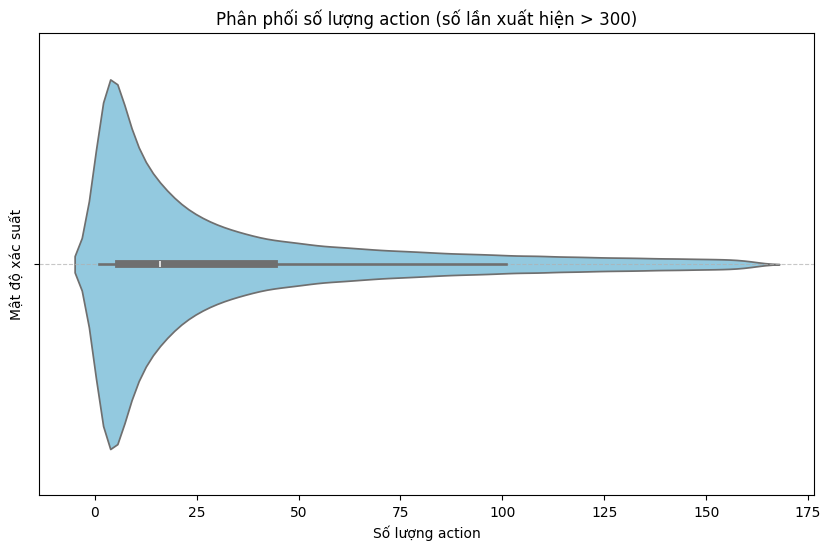

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lần xuất hiện của từng số lượng action
action_counts = grouped_data['count_action'].value_counts()

# Lọc các trường hợp có số lần xuất hiện của số lượng action lớn hơn 1
filtered_action_counts = action_counts[action_counts > 300]
print("Số lượng unique value", len(filtered_action_counts))
# Lọc các dòng trong grouped_data mà số lần xuất hiện của count_action lớn hơn 1
filtered_grouped_data = grouped_data[grouped_data['count_action'].isin(filtered_action_counts.index)]

# Vẽ biểu đồ violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=filtered_grouped_data['count_action'], color='skyblue')
plt.title('Phân phối số lượng action (số lần xuất hiện > 300)')
plt.xlabel('Số lượng action')
plt.ylabel('Mật độ xác suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##object

In [ ]:
train_log.object.isnull().sum()

7695279

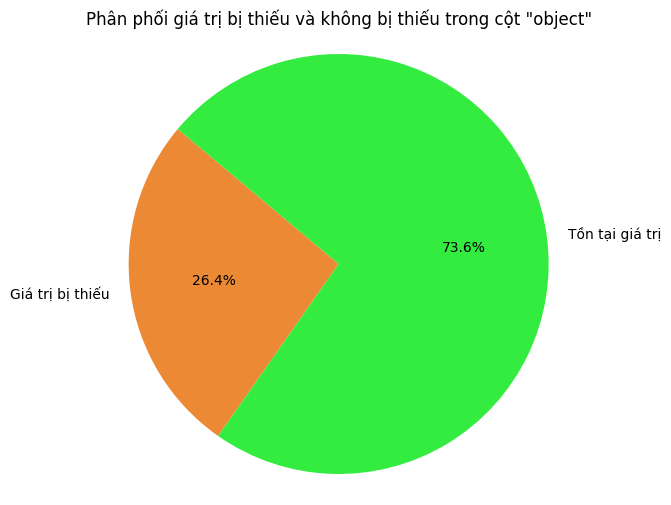

In [ ]:
# Đếm số lượng giá trị bị thiếu và không bị thiếu trong cột "object"
missing_values = train_log['object'].isnull().sum()
valid_values = train_log['object'].notnull().sum()

# Tính phần trăm
total_values = len(train_log['object'])
percent_missing = (missing_values / total_values) * 100
percent_valid = (valid_values / total_values) * 100

# Biểu đồ tròn
labels = ['Giá trị bị thiếu', 'Tồn tại giá trị']
sizes = [percent_missing, percent_valid]
colors = ['#eb8934','#34eb40']
plt.figure(figsize=(8, 6))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối giá trị bị thiếu và không bị thiếu trong cột "object"')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

**Cột "object" là cột ghi nhận sự phản hồi của học viên đối với action. Có 26.4% trong tổng số mẫu bị thiếu giá trị.**

In [ ]:
train_log.object.value_counts()

,count
object,
ddd62bf2c3924fd388ca22b4c56e243b,207239
3f270c8babd04c3ca3c5711a8040166f,132618
0d5b3962d09b490fac9daee6aedbda82,110601
9411a34faa4343b2be8cfe99b30b4eaf,92591
98209e8f260d4629821fb8e3885ac3bf,92279
...,...
55ae1468f605ab6114001f61,1
55af34a4f605ab240c001ef2,1
55b210fbf605abeca2000082,1


In [ ]:
train_log.object.nunique()

56908

**Nhận xét:** Cột "object" có thể là tương tự với cột "course_id". Tuy nhiên nó bị thiếu giá trị. Với bản chất, chủ đề của các khóa học khác nhau thì việc phản hồi tương tác cũng sẽ khác nhau. Cần cân nhắc lại xem cột này có hữu ích xong quá trình xử lý và đưa ra dự đoán hay không?

##time

In [ ]:
train_log['time'] = pd.to_datetime(train_log['time'])

In [ ]:
train_log.time.describe()

,time
count,29165540
mean,2016-04-02 08:58:48.610039040
min,2015-06-04 16:37:50
25%,2015-10-15 23:02:01
50%,2016-03-18 22:15:06.500000
75%,2016-07-21 21:40:22.249999872
max,2017-06-05 07:57:28


**=> Theo bảng tóm tắt trên thì cột time phân bố giá trị khá hợp lý. (Giá trị min 04/06/2015 có thể tạm chấp nhận được mặc dù bộ dữ liệu được thu thấp từ 08/2015)**

##user trên course_id

In [ ]:
grouped_user_course = train_log.groupby(['course_id'])['username'].agg(list).reset_index()

# Tạo cột count_user
grouped_user_course['count_user'] = grouped_user_course['username'].apply(len)
print(len(grouped_user_course))
grouped_user_course.head()

247


,course_id,username,count_user
0,CAU/08112500x/2015_T2,"[482052, 482052, 482052, 482052, 744035, 74403...",47051
1,MITx/15_390x_2015_T1/2015_T1,"[279695, 279695, 279695, 279695, 279695, 27969...",53317
2,MITx/6_041x/2014_T2,"[4791229, 4791229, 4791229, 4791229, 4791229, ...",22709
3,NCTU/nctucmpsd/2015_T2,"[707108, 707108, 707108, 707108, 707108, 70710...",25973
4,TsinghuaX/00680082X/2016_T1,"[86362, 886412, 886412, 886412, 886412, 886412...",50944


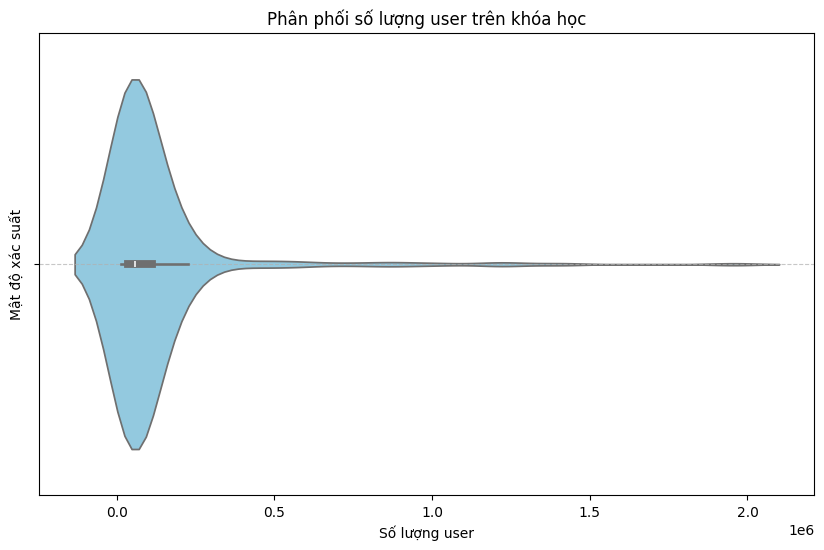

In [ ]:
import seaborn as sns

# Vẽ biểu đồ violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=grouped_user_course['count_user'] , color='skyblue')
plt.title('Phân phối số lượng user trên khóa học')
plt.xlabel('Số lượng user')
plt.ylabel('Mật độ xác suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##course_id trên user

In [ ]:
grouped_course_user = train_log.groupby(['username'])['course_id'].agg(list).reset_index()

# Tạo cột count_course
grouped_course_user['count_course'] = grouped_user_course['course_id'].apply(len)
print(len(grouped_course_user))
grouped_course_user.head()

69823


,username,course_id,count_course
0,5,"[TsinghuaX/70240183x/2015_T2, TsinghuaX/702401...",21.0
1,7,"[course-v1:MITx+6_00_1x+2015_T1, course-v1:MIT...",28.0
2,26,"[course-v1:TsinghuaX+00690863X+2017_T1, course...",19.0
3,32,"[course-v1:TsinghuaX+90640012X+2016_T1, course...",22.0
4,35,"[course-v1:TsinghuaX+30240184+2015_T2, course-...",27.0


In [ ]:
grouped_course_user.shape

(69823, 3)

In [ ]:
train_log.shape

(29165540, 7)

In [ ]:
user_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/user_info.csv')

In [ ]:
df_1 = pd.merge(grouped_course_user, user_info, left_on='username', right_on='user_id')
df_1.drop('user_id', axis=1, inplace=True)

In [ ]:
df_1.head()

,username,course_id,count_course,gender,education,birth
0,5,"[TsinghuaX/70240183x/2015_T2, TsinghuaX/702401...",21.0,male,Doctorate,1985.0
1,7,"[course-v1:MITx+6_00_1x+2015_T1, course-v1:MIT...",28.0,male,Bachelor's,1991.0
2,26,"[course-v1:TsinghuaX+00690863X+2017_T1, course...",19.0,female,Master's,1983.0
3,32,"[course-v1:TsinghuaX+90640012X+2016_T1, course...",22.0,female,High,1992.0
4,35,"[course-v1:TsinghuaX+30240184+2015_T2, course-...",27.0,male,Bachelor's,1993.0


In [ ]:
grouped_course_user['username'].unique().shape[0]

69823

In [ ]:
df_1.shape

(69823, 6)

In [ ]:
user_info.shape

(9627148, 4)

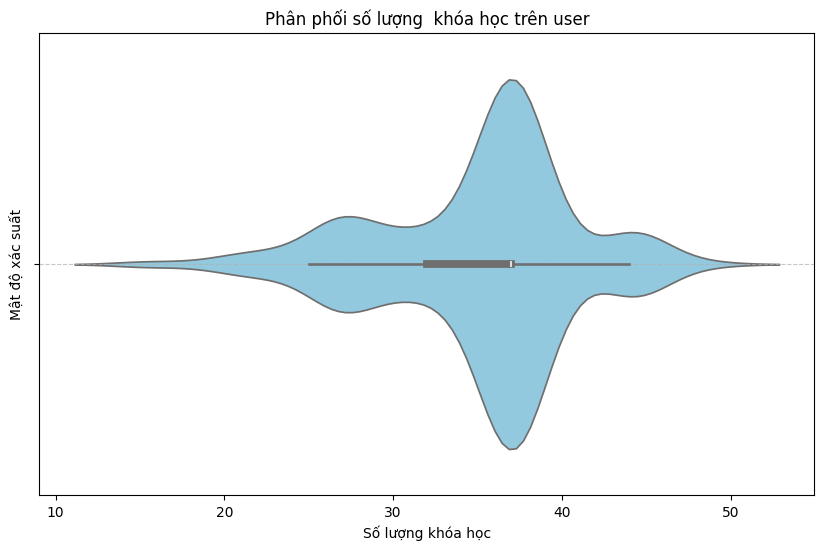

In [ ]:
import seaborn as sns

# Vẽ biểu đồ violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=grouped_course_user['count_course'], color='skyblue')
plt.title('Phân phối số lượng  khóa học trên user')
plt.xlabel('Số lượng khóa học')
plt.ylabel('Mật độ xác suất')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Biểu đồ thể hiện số lượng khóa học mà người dùng đã tham gia. sự phân bố của số lượng khóa học trên người dùng

